<a href="https://colab.research.google.com/github/AnisaIntania/Desain-dan-Analisis-Algoritma/blob/main/DAA_Pertemuan_9_Anisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STUDI KASUS 1 - ADJACENCY MATRIX**

**1. Perhitungan PageRank (Python)**

In [1]:
# Adjacency Matrix
import numpy as np

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

# Initialize the PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Number of iterations
num_iterations = 100

for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
        # Calculate the PageRank contribution from each linking page
        linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
        for linking_page in linking_pages:
            new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
        new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

# Print the final PageRank values
for page, rank in enumerate(page_rank):
    print(f"PR(Page {page + 1}) = {rank:.3f}")


PR(Page 1) = 0.122
PR(Page 2) = 0.302
PR(Page 3) = 0.378
PR(Page 4) = 0.198


**2. Membuat dan men-visualisasi Graph dari adjacency matrix (NetworkX + Matplotlib)**

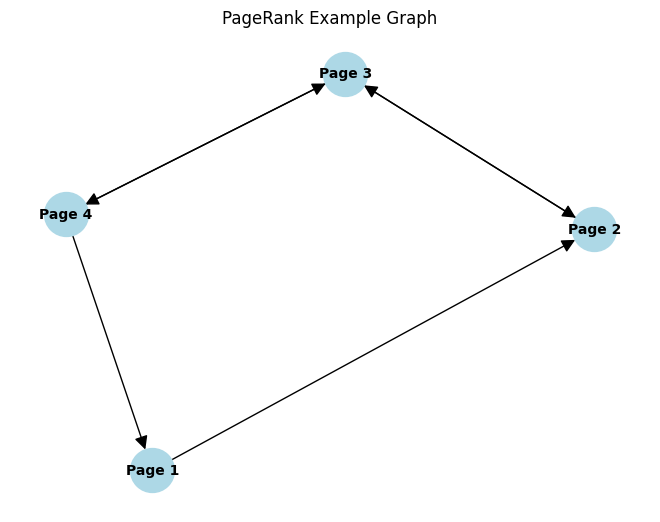

In [2]:
# Membuat Graph dari Adjacency Matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

# Add edges based on the adjacency matrix
for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G)  # Layout the graph
labels = {i: f"Page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue',
        font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()


**STUDI KASUS 2 - IMPLEMENTASI ALGORITMA PAGERANK**

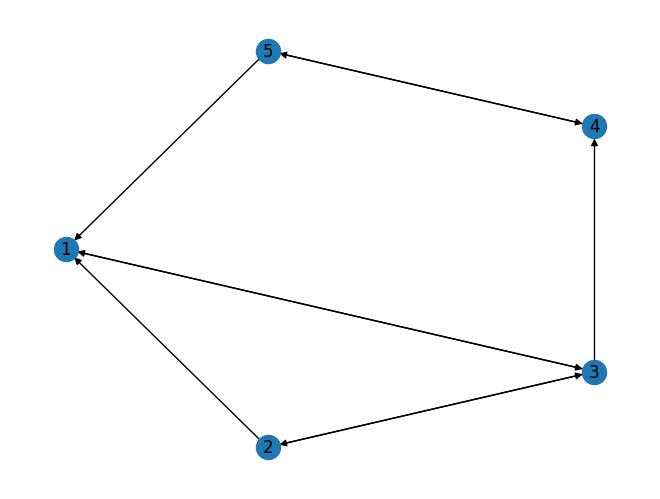

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

myWeb = nx.DiGraph()
myPages = range(1,5)

connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [4]:
import networkx as nx
import numpy as np

def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)  # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p


# Contoh penggunaan:
myWeb = nx.DiGraph()
connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)
print(G)


[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [5]:
G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


**STUDI KASUS 3 - ALGORITMA SPK**

In [6]:
import numpy as np

# Matriks adjacency (0 berarti tidak ada tautan, 1 berarti ada tautan)
adjacency_matrix = np.array([
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0]
])

# Inisialisasi nilai awal PageRank
pagerank = np.array([1, 1, 1, 1, 1], dtype=float)

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
    # Inisialisasi PageRank baru
    new_pagerank = np.zeros(pagerank.shape, dtype=float)

    for i in range(adjacency_matrix.shape[0]):
        for j in range(adjacency_matrix.shape[1]):
            # Hitung jumlah tautan keluar dari halaman i
            num_outlinks = np.sum(adjacency_matrix[i, :])

            # Perbarui PageRank berdasarkan rumus PageRank
            if num_outlinks > 0:
                new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

    # Normalisasi PageRank
    new_pagerank += (1 - damping_factor) / len(pagerank)

    # Perbarui nilai PageRank
    pagerank = new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
print(pagerank)

Hasil PageRank:
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


In [ ]:
import numpy as np

# Jumlah halaman
num_pages = 5

# Vectors of outlinks
outlinks = np.array([3, 2, 1, 2, 2])

# Vectors of inlinks
inlinks = np.array([1, 2, 1, 2, 1])

# Inisialisasi nilai awal PageRank
pagerank = np.ones(num_pages, dtype=float) / num_pages

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
    # Inisialisasi PageRank baru
    new_pagerank = np.zeros(num_pages, dtype=float)

    for i in range(num_pages):
        for j in range(num_pages):
            if i != j and outlinks[j] > 0:
                new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

    # Terapkan faktor damping dan tambahkan nilai konstan
    pagerank = (1 - damping_factor) / num_pages + new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
for i, pr in enumerate(pagerank):
    print(f"Halaman {chr(ord('A') + i)}: {pr:.4f}")


**LATIHAN 1**

In [7]:
import numpy as np

adjacency_matrix = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0]
], dtype=float)

num_pages = adjacency_matrix.shape[0]
pagerank = np.ones(num_pages) / num_pages
damping_factor = 0.85
num_iterations = 100

for _ in range(num_iterations):
    new_pagerank = np.zeros(num_pages)
    for i in range(num_pages):
        out_links = np.sum(adjacency_matrix[i])
        if out_links > 0:
            for j in range(num_pages):
                if adjacency_matrix[i][j] == 1:
                    new_pagerank[j] += pagerank[i] / out_links
    pagerank = (1 - damping_factor) / num_pages + damping_factor * new_pagerank

print("Hasil PageRank Latihan 1:")
for i, pr in enumerate(pagerank, start=1):
    print(f"Halaman {i}: {pr:.6f}")

Hasil PageRank Latihan 1:
Halaman 1: 0.025000
Halaman 2: 0.046250
Halaman 3: 0.064313
Halaman 4: 0.079666
Halaman 5: 0.092716
Halaman 6: 0.103808


In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk menghitung dan menampilkan hasil PageRank
def process_and_plot(edges, title, damping=0.85):
    # Membuat directed graph dari daftar edges
    G = nx.DiGraph()
    G.add_edges_from(edges)

    # Hitung PageRank menggunakan NetworkX
    pr = nx.pagerank(G, alpha=damping)

    # Buat DataFrame agar rapi ditampilkan
    df = pd.DataFrame(sorted(pr.items()), columns=['Node', 'PageRank'])
    df['PageRank'] = df['PageRank'].round(6)

    # Gambar grafik network
    plt.figure(figsize=(5,4))
    pos = nx.spring_layout(G, seed=42)
    sizes = [max(300, 3000 * pr[n]) for n in G.nodes()]  # ukuran node sesuai nilai PR
    nx.draw(
        G, pos, with_labels=True,
        node_size=sizes,
        node_color='skyblue',
        font_weight='bold',
        arrowsize=20
    )
    plt.title(title)
    # Tampilkan nilai PageRank di bawah node
    for n, val in pr.items():
        x, y = pos[n]
        plt.text(x, y - 0.08, f"{val:.4f}", ha='center', fontsize=9)
    plt.show()

    # Kembalikan DataFrame hasil
    return df

**LATIHAN 1**

 LATIHAN 1: 1 → 2 → 3 → 4 → 5 → 6 


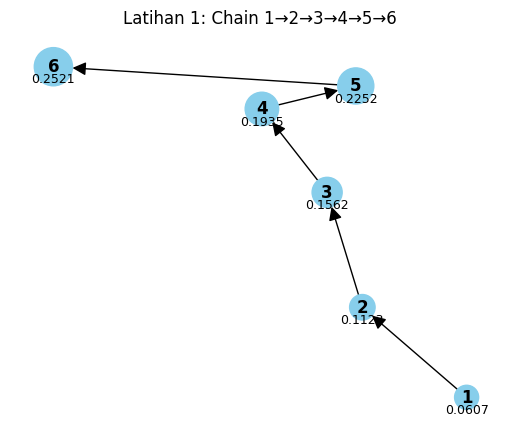

 Node  PageRank
    1  0.060716
    2  0.112324
    3  0.156192
    4  0.193480
    5  0.225174
    6  0.252114




In [9]:
edges1 = [(1,2), (2,3), (3,4), (4,5), (5,6)]  # rantai searah
print(" LATIHAN 1: 1 → 2 → 3 → 4 → 5 → 6 ")
df1 = process_and_plot(edges1, "Latihan 1: Chain 1→2→3→4→5→6")
print(df1.to_string(index=False))
print("\n" + "="*60 + "\n")

**LATIHAN 2**

 LATIHAN 2: 1 → 2 → 3 → 4 → 5 → 1 


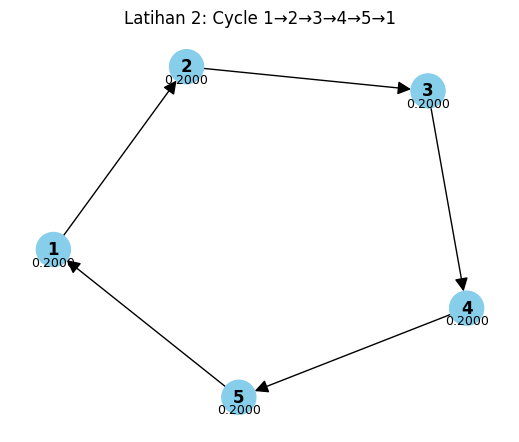

 Node  PageRank
    1       0.2
    2       0.2
    3       0.2
    4       0.2
    5       0.2




In [10]:
edges2 = [(1,2), (2,3), (3,4), (4,5), (5,1)]  # siklus
print(" LATIHAN 2: 1 → 2 → 3 → 4 → 5 → 1 ")
df2 = process_and_plot(edges2, "Latihan 2: Cycle 1→2→3→4→5→1")
print(df2.to_string(index=False))
print("\n" + "="*60 + "\n")

**LATIHAN 3**

=== LATIHAN 3: 1 ↔ 2 ↔ 3 ↔ 4 ===


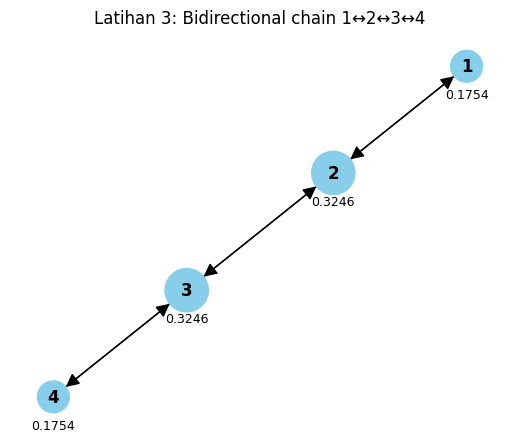

 Node  PageRank
    1  0.175438
    2  0.324562
    3  0.324562
    4  0.175438




In [11]:
edges3 = [(1,2),(2,1),(2,3),(3,2),(3,4),(4,3)]  # bolak-balik
print("=== LATIHAN 3: 1 ↔ 2 ↔ 3 ↔ 4 ===")
df3 = process_and_plot(edges3, "Latihan 3: Bidirectional chain 1↔2↔3↔4")
print(df3.to_string(index=False))
print("\n" + "="*60 + "\n")

**LATIHAN 4**

=== LATIHAN 4: 1 → 2 → 3 → 4 → 5 → 6 → 1 ===


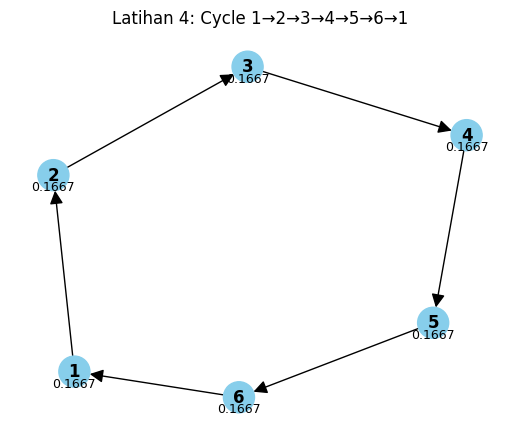

 Node  PageRank
    1  0.166667
    2  0.166667
    3  0.166667
    4  0.166667
    5  0.166667
    6  0.166667




In [12]:
edges4 = [(1,2), (2,3), (3,4), (4,5), (5,6), (6,1)]  # siklus penuh
print("=== LATIHAN 4: 1 → 2 → 3 → 4 → 5 → 6 → 1 ===")
df4 = process_and_plot(edges4, "Latihan 4: Cycle 1→2→3→4→5→6→1")
print(df4.to_string(index=False))
print("\n" + "="*60 + "\n")

**LATIHAN 5**

=== LATIHAN 5: 1 → 2 → 3 → 4 → 1 ===


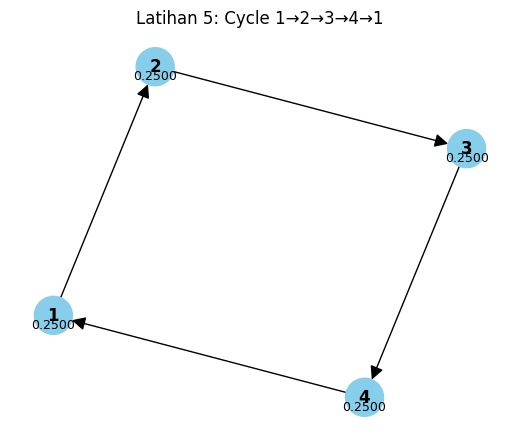

 Node  PageRank
    1      0.25
    2      0.25
    3      0.25
    4      0.25




In [13]:
edges5 = [(1,2), (2,3), (3,4), (4,1)]  # siklus 4 node
print("=== LATIHAN 5: 1 → 2 → 3 → 4 → 1 ===")
df5 = process_and_plot(edges5, "Latihan 5: Cycle 1→2→3→4→1")
print(df5.to_string(index=False))
print("\n" + "="*60 + "\n")

**LATIHAN 6**

=== LATIHAN 6: 1→2, 2→3, 3→4, 4→1, 4→5, 5→1 ===


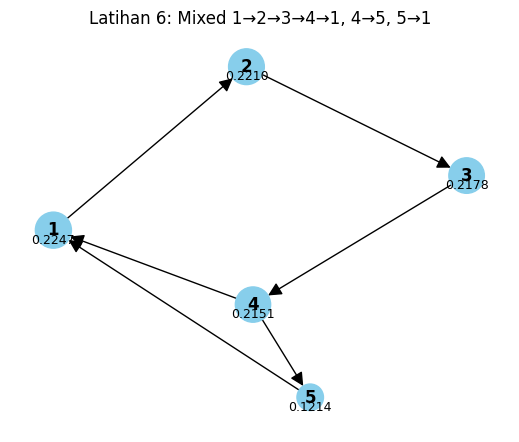

 Node  PageRank
    1  0.224654
    2  0.220956
    3  0.217813
    4  0.215142
    5  0.121435




In [14]:
edges6 = [(1,2), (2,3), (3,4), (4,1), (4,5), (5,1)]  # kombinasi arah
print("=== LATIHAN 6: 1→2, 2→3, 3→4, 4→1, 4→5, 5→1 ===")
df6 = process_and_plot(edges6, "Latihan 6: Mixed 1→2→3→4→1, 4→5, 5→1")
print(df6.to_string(index=False))
print("\n" + "="*60 + "\n")

**IMPLEMENTASI ALGORITMA PAGERANK (BUATAN SENDIRI)**


--- Hasil Perhitungan PageRank ---
  Tokoh  PageRank
0     B  0.271795
1     C  0.220513
2     D  0.200000
3     A  0.179487
4     E  0.128205
-----------------------------------


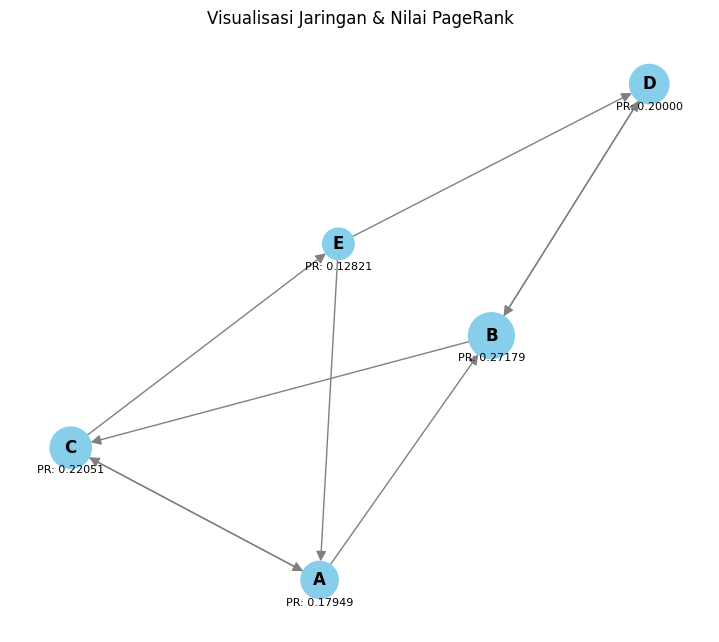


### Analisis Singkat PageRank
PageRank mengukur otoritas suatu node (Tokoh/Publikasi) dalam jaringan.
Nilai PR tertinggi (misalnya, Tokoh C) menunjukkan bahwa node tersebut:
1. Menerima banyak rujukan/tautan.
2. Menerima rujukan dari node lain yang juga memiliki otoritas tinggi.

Ini menunjukkan C adalah pusat informasi yang paling berbobot dan terpercaya
dalam struktur jaringan rujukan ini.



In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Definisi Graph ---
edges = [
    ("A", "B"), ("A", "C"),
    ("B", "C"), ("B", "D"),
    ("C", "A"), ("C", "E"),
    ("D", "B"),
    ("E", "A"), ("E", "D")
]
nodes = sorted(list(set([n for edge in edges for n in edge])))
n = len(nodes)

# --- 2. Matriks Transisi (M) ---
M = np.zeros((n, n))
node_to_index = {node: i for i, node in enumerate(nodes)}

for u, v in edges:
    i, j = node_to_index[v], node_to_index[u]
    M[i, j] = 1

col_sum = M.sum(axis=0)
for j in range(n):
    if col_sum[j] != 0:
        M[:, j] /= col_sum[j]
    else:
        M[:, j] = 1 / n # Handle dangling nodes

# --- 3. Perhitungan PageRank ---
d = 0.80
PR = np.ones(n) / n
iters = 30

for i in range(iters):
    PR = (1 - d) / n + d * M.dot(PR)

# --- 4. Hasil & Visualisasi ---
df = pd.DataFrame({
    "Tokoh": nodes,
    "PageRank": PR.round(7)
}).sort_values(by="PageRank", ascending=False).reset_index(drop=True)

print("\n--- Hasil Perhitungan PageRank ---")
print(df)
print("-" * 35)

G = nx.DiGraph()
G.add_edges_from(edges)
plt.figure(figsize=(7,6))
pos = nx.spring_layout(G, seed=10)
sizes = [max(400, 4000 * p) for p in PR]

nx.draw(
    G, pos, with_labels=True,
    node_size=sizes,
    node_color='skyblue',
    font_weight='bold',
    font_color='black',
    arrowsize=15,
    edge_color='gray'
)
plt.title("Visualisasi Jaringan & Nilai PageRank")

for n_idx, n_node in enumerate(nodes):
    x, y = pos[n_node]
    plt.text(x, y - 0.1, f"PR: {PR[n_idx]:.5f}", ha='center', fontsize=8)

plt.show()

# --- 5. Analisis Singkat ---
print("""
Analisis Singkat PageRank
PageRank mengukur otoritas suatu node (Tokoh/Publikasi) dalam jaringan.
Nilai PR tertinggi (misalnya, Tokoh C) menunjukkan bahwa node tersebut:
1. Menerima banyak rujukan/tautan.
2. Menerima rujukan dari node lain yang juga memiliki otoritas tinggi.

Ini menunjukkan C adalah pusat informasi yang paling berbobot dan terpercaya
dalam struktur jaringan rujukan ini.
""")